In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

In [ ]:
data1=pd.DataFrame(load_breast_cancer(as_frame=True).frame)

In [ ]:
data1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
x1,y1=load_breast_cancer(return_X_y=True,as_frame=False)

In [ ]:
feature_names=load_breast_cancer(return_X_y=False,as_frame=False).feature_names
dir(feature_names)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1)

In [ ]:
x1_train.shape

(426, 30)

In [ ]:
y1_train.shape

(426,)

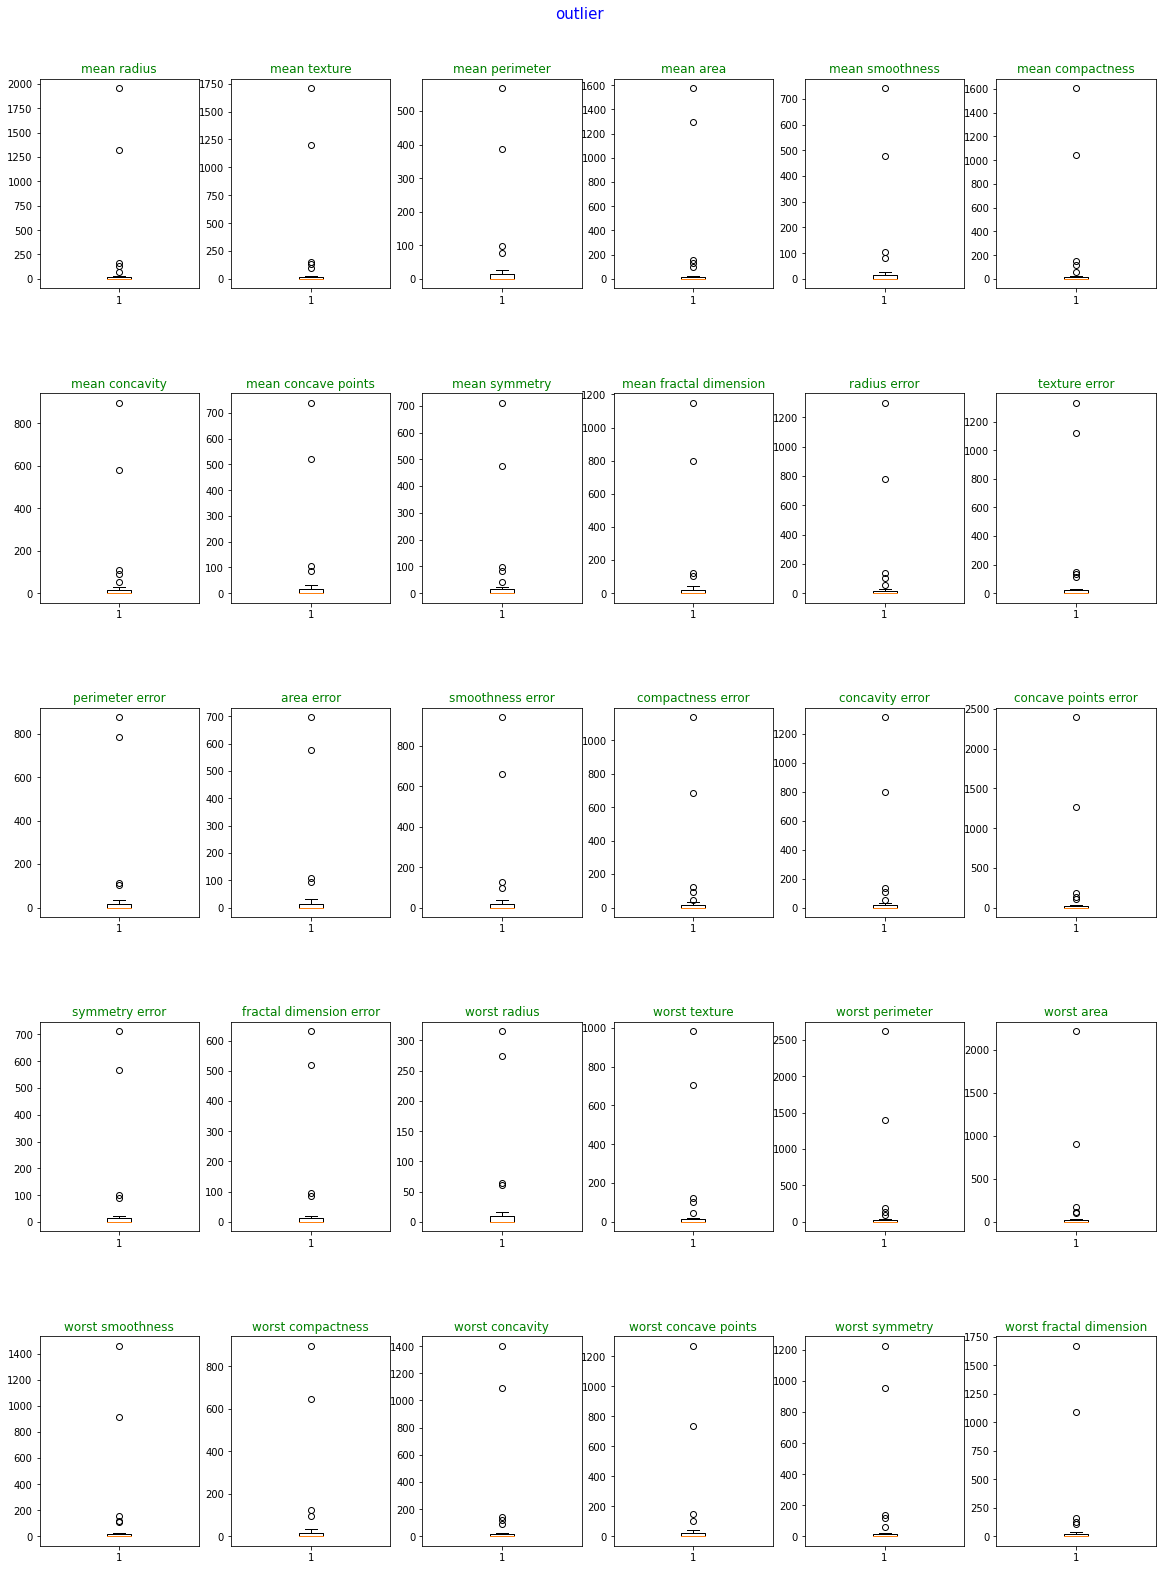

In [ ]:
# boxplot
plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=.5,top=0.94)

fly={}
for i in range(1,31):          #(1,31) is no. of colums
  plt.subplot(5,6,i)           #(5,6,i) i.e 5 rows of plot an 6 columns of plots 
  plt.title(feature_names[i-1],color='green')
  plt.suptitle('outlier',fontsize=15,color='blue')
  box=plt.boxplot(x1[i],showfliers=True)
  fly[feature_names[i-1]]=[item.get_ydata() for item in box['fliers']]

In [ ]:
fly # all outliers

{'mean radius': [array([ 132.9 , 1326.  ,   74.08,  158.8 , 1956.  ])],
 'mean texture': [array([ 130.  , 1203.  ,   94.03,  152.5 , 1709.  ])],
 'mean perimeter': [array([ 77.58, 386.1 ,  98.87, 567.7 ])],
 'mean area': [array([ 135.1 , 1297.  ,   94.44,  152.2 , 1575.  ])],
 'mean smoothness': [array([ 82.57, 477.1 , 103.4 , 741.6 ])],
 'mean compactness': [array([ 119.6 , 1040.  ,   53.91,  153.2 , 1606.  ])],
 'mean concavity': [array([ 90.2 , 577.9 ,  50.96, 110.6 , 897.  ])],
 'mean concave points': [array([ 87.5, 519.8, 106.2, 739.3])],
 'mean symmetry': [array([ 83.97, 475.9 ,  40.68,  97.65, 711.4 ])],
 'mean fractal dimension': [array([ 102.7,  797.8,  123.8, 1150. ])],
 'radius error': [array([ 103.6 ,  781.  ,   54.16,  136.5 , 1299.  ])],
 'texture error': [array([ 132.4, 1123. ,  116.2,  151.7, 1332. ])],
 'perimeter error': [array([103.7, 782.7, 112. , 876.5])],
 'area error': [array([ 93.6, 578.3, 108.8, 697.7])],
 'smoothness error': [array([ 96.73, 658.8 , 124.1 , 943

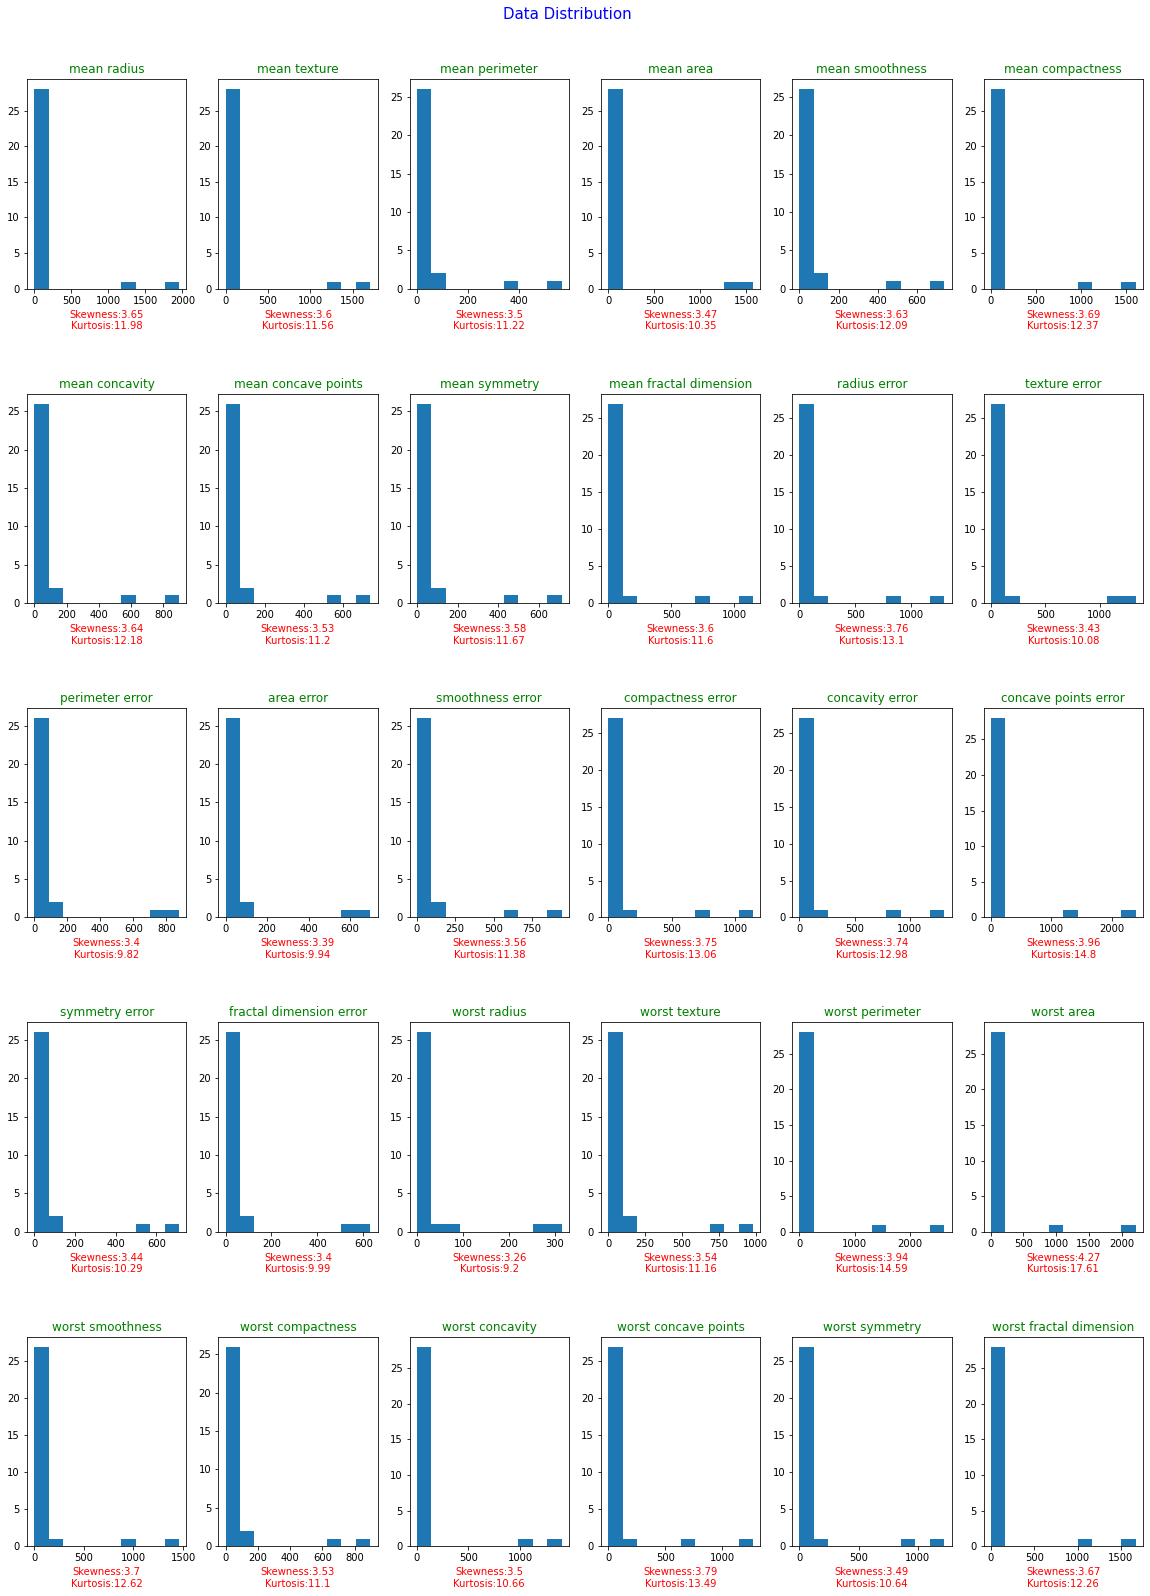

In [ ]:
from scipy.stats import skew,kurtosis

plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=.5,top=0.94)

for i in range(1,31):          #(1,31) is no. of colums
  plt.subplot(5,6,i)           #(5,6,i) i.e 5 rows of plot an 6 columns of plots 
  plt.title(feature_names[i-1],color='green')
  plt.suptitle('Data Distribution',fontsize=15,color='blue')
  plt.hist(x1[i])
  sk=f'Skewness:{round(skew(x1[i]),2)}\nKurtosis:{round(kurtosis(x1[i]),2)}'
  plt.xlabel(sk,color='r')

In [ ]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=40) # if not given criterion it'll consider gini index
dtc.fit(x1_train,y1_train)
pred=dtc.predict(x1_test)

In [ ]:
print(classification_report(y1_test,pred)) # always use print

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        49
           1       0.92      0.94      0.93        94

    accuracy                           0.90       143
   macro avg       0.89      0.89      0.89       143
weighted avg       0.90      0.90      0.90       143



0= no
1= yes

 accuracy= 0.92 
 
 if accuracy score for 1 is good then model is good as we train model for 1

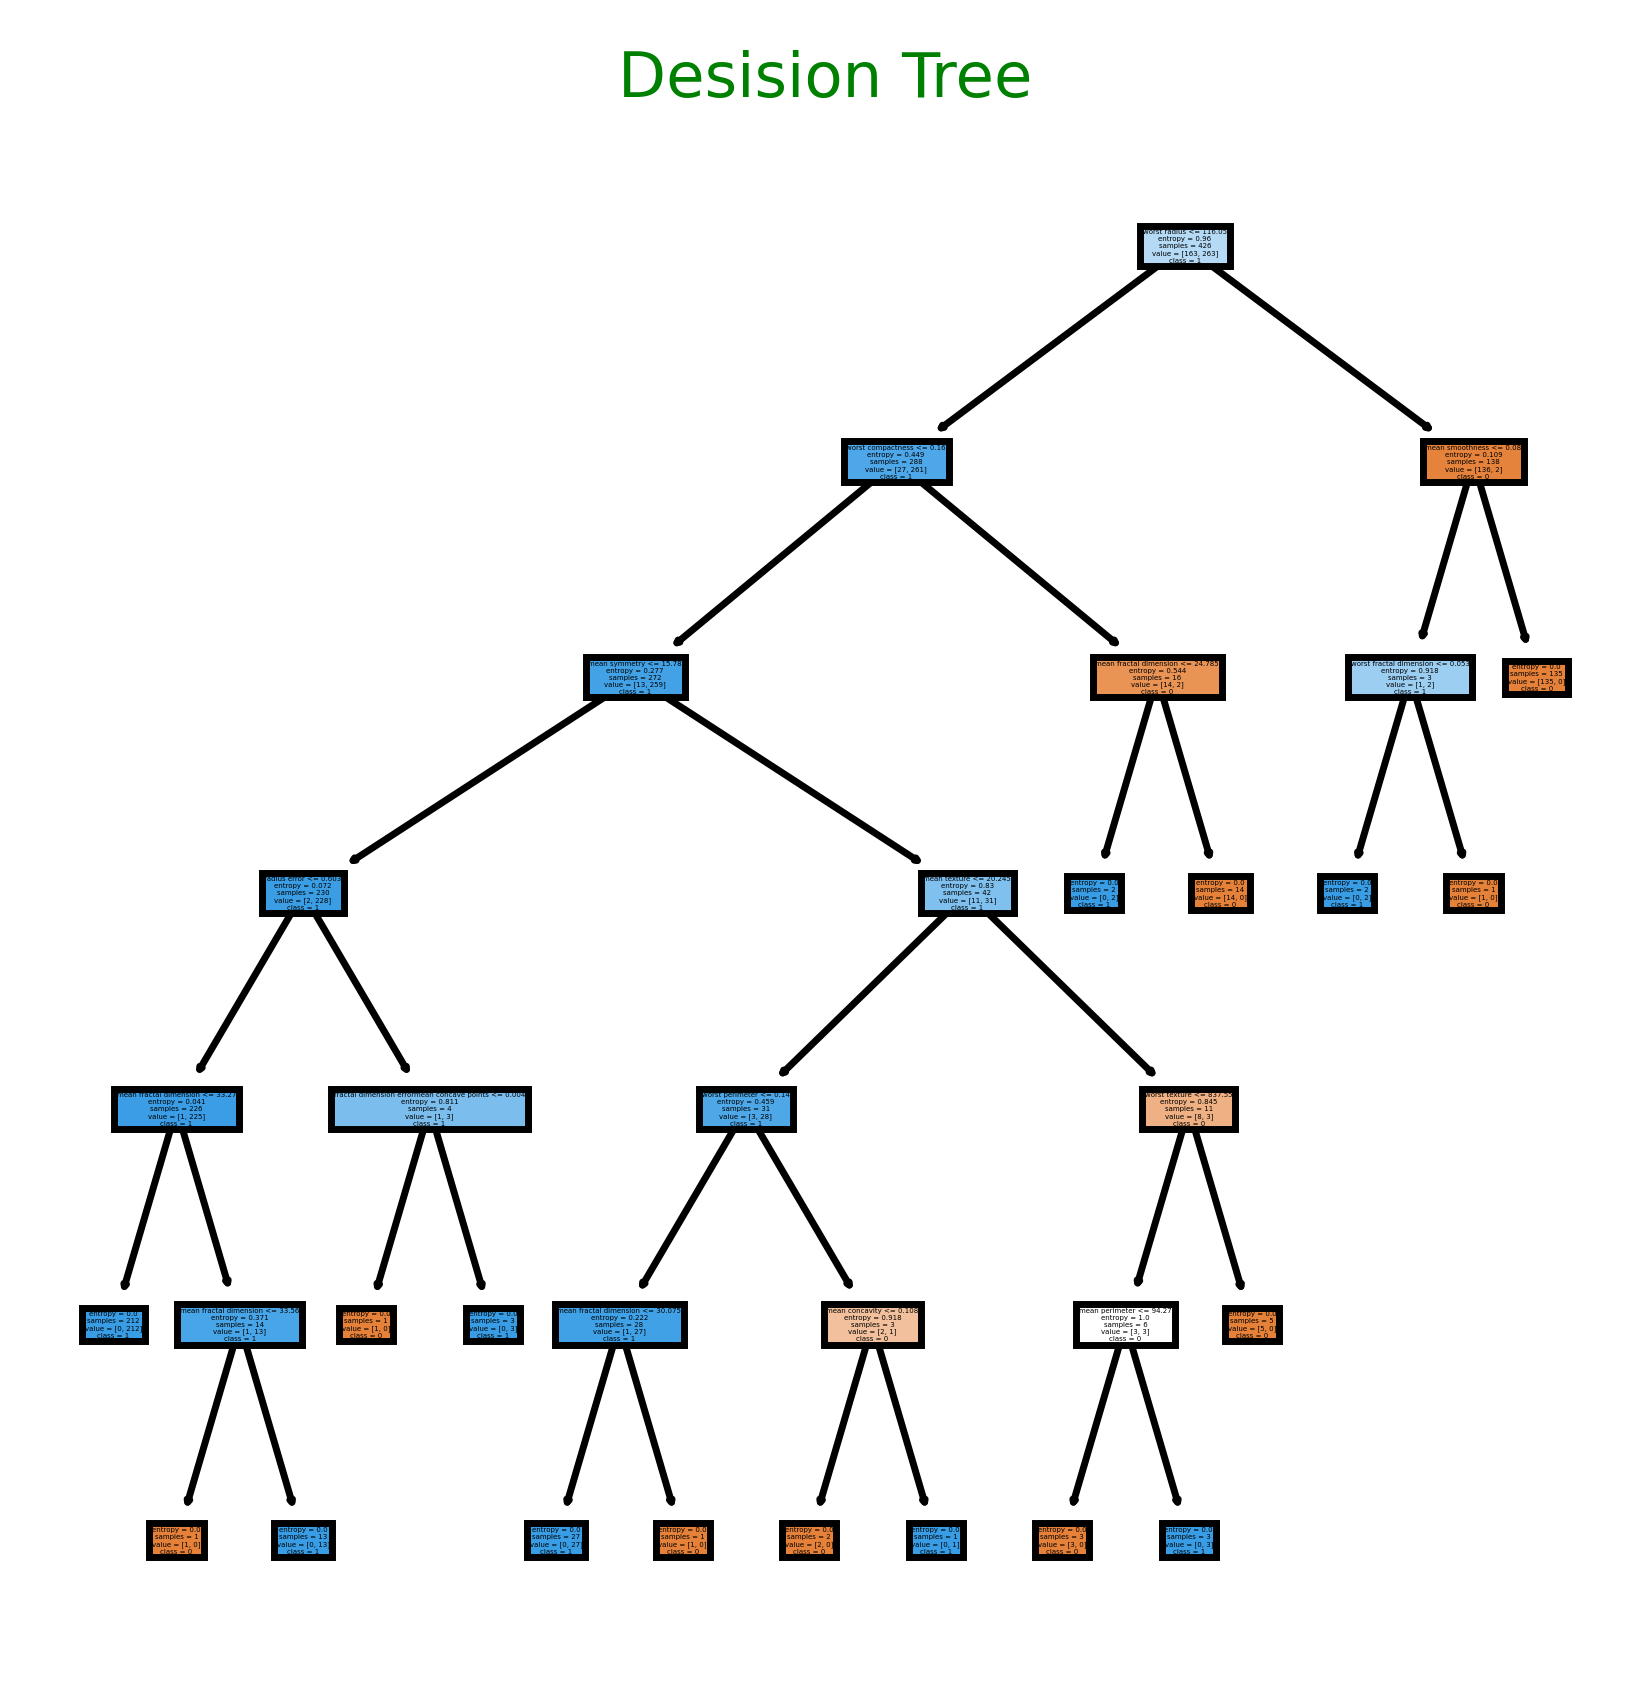

In [ ]:
fn=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
'mean smoothness', 'mean compactness', 'mean concavity',
'worst concave points', 'worst symmetry', 'worst fractal dimension',
'radius error', 'texture error', 'perimeter error', 'area error',
'smoothness error', 'compactness error', 'concavity error', 
'concave points error', 'symmetry error', 'fractal dimension error'
'mean concave points', 'mean symmetry', 'mean fractal dimension', 
'worst radius',  'worst texture', 'worst perimeter', 'worst area',
'worst smoothness', 'worst compactness', 'worst concavity'	
'worst concave points'	'worst symmetry'	'worst fractal dimension'	,
'target']

 # .value_count.keys
cn=["0","1"]

from sklearn import tree

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=500)
tree.plot_tree(dtc,feature_names=fn,class_names=cn,filled=True)
plt.title("Desision Tree",color='green',fontsize=9)
plt.show()

### Predict what is diabetes level

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
data1=pd.DataFrame(load_diabetes(as_frame=True).frame)

In [ ]:
# for regression tree seperate x and y
x,y=data1.iloc[:,:-1],data1.iloc[:,-1]

In [ ]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [ ]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [ ]:
# features of x
x.columns,len(x.columns)

(Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object'),
 10)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=20,random_state=40)

In [ ]:
dr=DecisionTreeRegressor(min_samples_split=6,random_state=40)
dr.fit(x_train,y_train)

DecisionTreeRegressor(min_samples_split=6, random_state=40)

In [ ]:
dtc=DecisionTreeClassifier(random_state=40)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=40)

In [ ]:
pred=dr.predict(x_test)

In [ ]:
pred

array([ 66.5       , 148.66666667, 151.2       ,  77.        ,
       164.        ,  77.        , 166.        ,  45.25      ,
       275.75      ,  99.        ,  98.4       ,  80.2       ,
        91.5       , 139.        , 141.2       , 275.75      ,
       201.5       , 168.        ,  91.5       , 246.        ])

In [ ]:
from sklearn.metrics import mean_squared_error  # to evaluate dtr we use mean_squared_error

In [ ]:
mean_squared_error(y_test,pred)   # always y_test

12637.825597222221

each value is different with 12637.825597222221  
bad model